In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df = pd.read_csv("df_N.csv")

In [70]:
df.describe()

,Marketing Spend,Profit
count,17.000000,17.000000
mean,182540.929412,103905.175294
std,115878.956226,44446.359357
min,0.000000,14681.400000
25%,127716.820000,78239.910000
50%,174999.300000,97427.840000
75%,252664.930000,134307.350000
max,443898.530000,191792.060000


In [71]:
x = df["Marketing Spend"]
y = df["Profit"]
m = len(x)                                    # number of data entry

In [72]:
def h(x, a0, a1):                             # hypothesis
    h = a0 + a1*x
    return h
def J(a0, a1, x, y, m):                       #cost function
    j = 0
    for i in range (m):
        j += (h(x[i], a0, a1) - y[i]) ** 2
    return j/(2*m)
def gradJ(a0, a1, x, y, m):                    # gradient of cost function
    Dja0 = 0 
    Dja1 = 0
    for i in range (m):
        Dja0 += (h(x[i],a0,a1) - y[i])
        Dja1 += (h(x[i],a0,a1) - y[i]) * x[i]
    gradJ = [Dja0/m, Dja1/m]
    return gradJ
def ap1(a0, a1, gJ, alpha):                    # updating the theta values
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1


4.832072612195461 3.0451706398839895


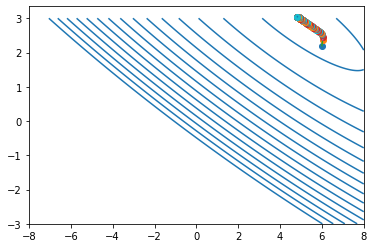

In [73]:
fig, ax = plt.subplots()
p0 = np.linspace(-8,8, 500)
p1 = np.linspace(-3,3, 500)
pa0, pa1 = np.meshgrid(p0, p1)      #The numpy.meshgrid function is used to create a rectangular grid out of 
                                    #two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. 

ax.contour(pa0,pa1,J(pa0,pa1,x/100000,y/10000,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,5)])
# levels : int or array-like, optional Determines the number and positions of the contour lines / regions.
a0 = 6
a1 = 2.2
ax.plot(a0,a1, 'o')

for i in range(300):
    a0old, a1old = a0, a1
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x/100000,y/10000,m), alpha=0.1 )
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-')
    

print(a0,a1)

In [74]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

x_new = (x - x_mean) / x_std           #mean Normalization
y_new = (y - y_mean) / y_std

-1 4
-0.5000000000000003 2.4913111070544387
-0.25000000000000033 1.692593457847965
-0.12500000000000033 1.2697429376798322
-0.06250000000000032 1.0458808975908207
-0.031250000000000326 0.9273656998966381
-0.01562500000000032 0.8646223599408944
-0.00781250000000032 0.831405297611383
-0.003906250000000293 0.8138197940251711
-0.0019531250000002606 0.804509821538353
-0.0009765625000002411 0.7995810125747435


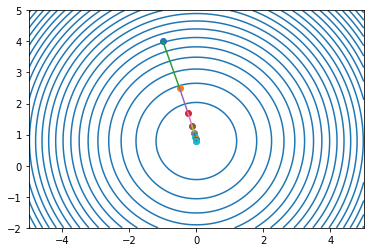

In [75]:
def plot_steps( startpt=[-1,4], alpha=.5, nsteps=10) :     # to draw contour plots and current value of theta
    fig, ax = plt.subplots()
    # setup the contour axis
    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)

    # plot the Cost function J
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,0.9)])

    # starting point
    #a0 = -1; a1 = 4
    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)

    # do the gradient descent loop and plot the progress
    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
        print(a0,a1) # the updated parameters
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-') # connect the dots
        
plot_steps( startpt=[-1,4], alpha=.5, nsteps=10)

In [76]:
def plot_s(start, alpha, epoch):
    fig, ax = plt.subplots()
    p0 = np.linspace(-8,8, 500)
    p1 = np.linspace(-3,3, 500)
    pa0, pa1 = np.meshgrid(p0, p1)

    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80, 0.9)])

    a0 = start[0]
    a1 = start[1]
    ax.plot(a0,a1, 'o')

    for i in range(epoch):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha )
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-')

# corrrected code above

#print(a0,a1)

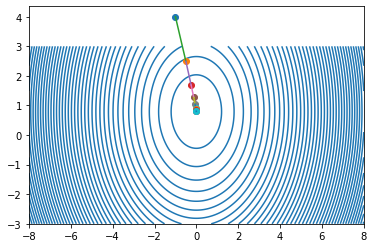

In [77]:
plot_s([-1, 4], 0.5, 10)

In [78]:
a0, a1

(4.832072612195461, 3.0451706398839895)

In [79]:
def plot_graph(x, y, a0, a1):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label = "traning data")
    ax.plot(x, h(x_new, a0, a1), label = "h(x) = %.2f + %.2f * x" %(a0, a1))
    plt.legend()

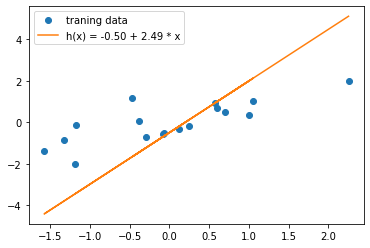

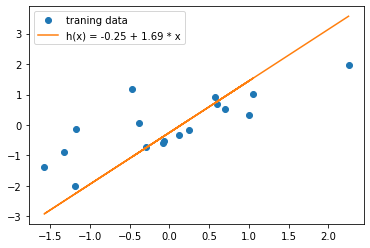

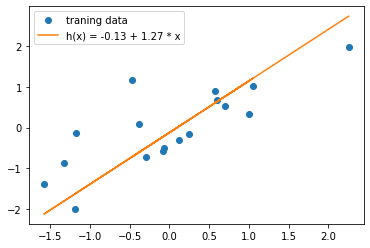

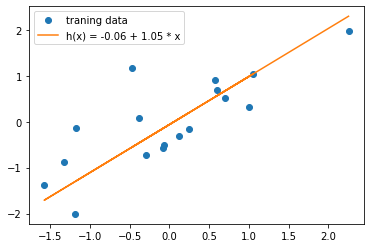

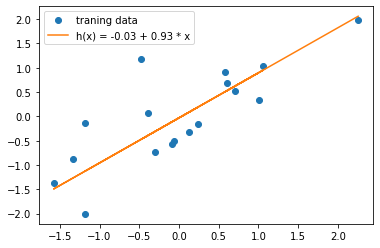

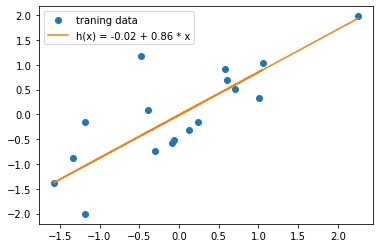

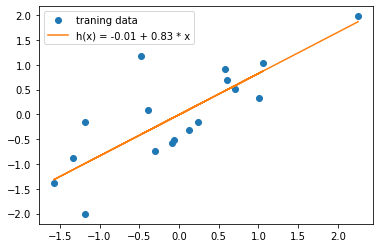

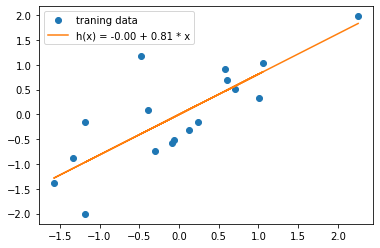

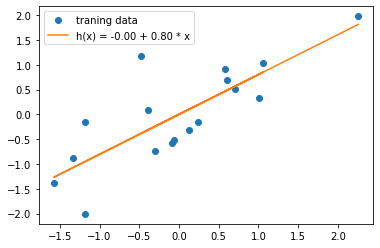

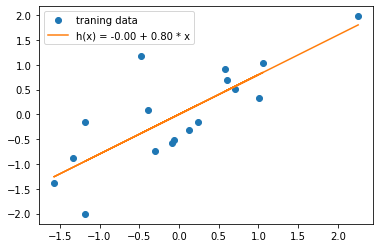

In [80]:
a0 = -1 
a1 = 4
for i in range (10) :
    a0, a1 = ap1(a0, a1, gJ = gradJ(a0, a1, x_new, y_new, m), alpha = 0.5)
    plot_graph(x_new, y_new, a0, a1)

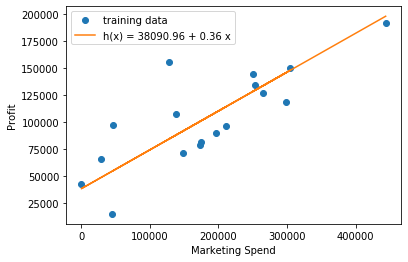

In [81]:
a0 = 0; a1 = 0.94
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

fig, ax = plt.subplots()
ax.plot(x,y, 'o', label='training data')
ax.plot(x, b0 + b1*x, label='h(x) = %.2f + %.2f x' %(b0, b1))
ax.set_xlabel('Marketing Spend')
ax.set_ylabel('Profit')
plt.legend();

**back transformation of parameters**
$$ x' = \frac{x - \overline x }{\sigma_x}, \quad y = \sigma_y y' + \overline y $$

$$ h(x) =  \sigma_y \left(a_0 + a_1 \left( \frac{x - \overline x }{\sigma_x} \right) \right) + \overline y$$ 

In [82]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre

In [89]:
a0 = 0
a1 = 0.94
predict(125600, a0, a1)

83375.40813396777